In [51]:
# Cell 1: Import Libraries
# Importing required libraries for data manipulation, visualization, and mapping.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot style for consistency
sns.set_style("whitegrid")

In [52]:
# Cell 2: Data Collection and Loading
# Loading the synthetic COVID-19 dataset from the project folder.
df = pd.read_csv('synthetic_covid19_data.csv')

# Preview the first few rows
df.head()

# Check column names
df.columns

# Check for missing values
df.isnull().sum()

date                       0
continent                  0
location                   0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
total_tests                0
new_tests                  0
positive_rate              0
tests_per_case             0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
hosp_patients              0
icu_patients               0
reproduction_rate          0
stringency_index           0
population                 0
population_density         0
median_age                 0
aged_65_older              0
aged_70_older              0
gdp_per_capita             0
extreme_poverty            0
cardiovasc_death_rate      0
diabetes_prevalence        0
dtype: int64

In [53]:
# Cell 3: Data Cleaning
# Preparing the data by filtering, handling missing values, and converting data types.

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for specific countries (updated to match dataset)
countries = ['India', 'USA', 'Canada']  # Replaced 'Kenya' with 'Canada', 'United States' with 'USA'
df_filtered = df[df['location'].isin(countries)]

# Drop rows with missing critical values (e.g., total_cases, total_deaths)
df_filtered = df_filtered.dropna(subset=['total_cases', 'total_deaths'])

# Fill missing vaccination data with 0 (assuming no vaccinations reported)
df_filtered['total_vaccinations'] = df_filtered['total_vaccinations'].fillna(0)

# Check cleaned data
df_filtered.isnull().sum()

# Debug: Print unique locations in df_filtered
print("Unique locations in df_filtered:")
print(df_filtered['location'].unique())

Unique locations in df_filtered:
['India' 'Canada' 'USA']


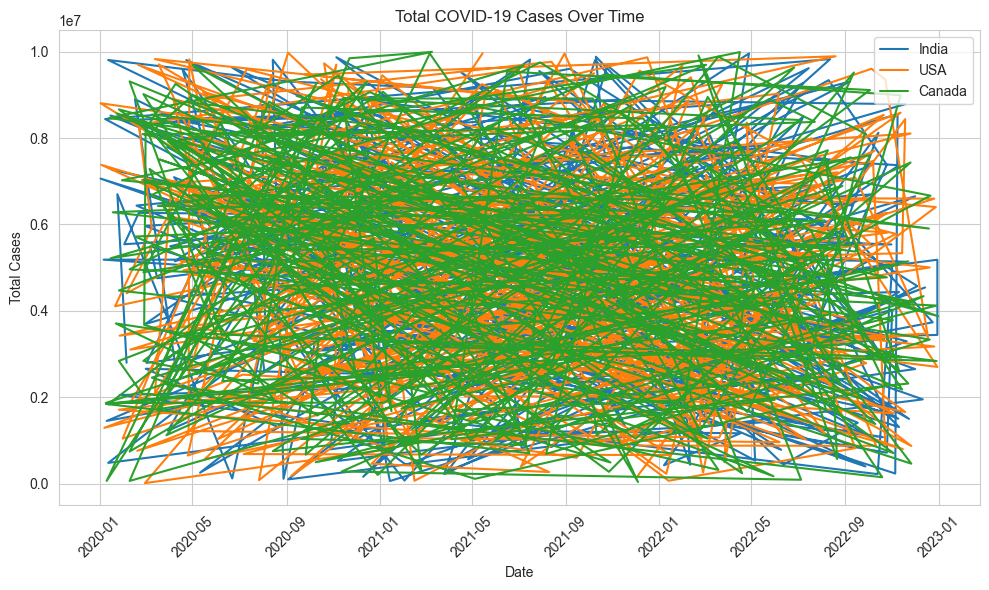

In [54]:
# Cell 4: Exploratory Data Analysis (EDA) - Total Cases Over Time
# Plot total cases over time for selected countries
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

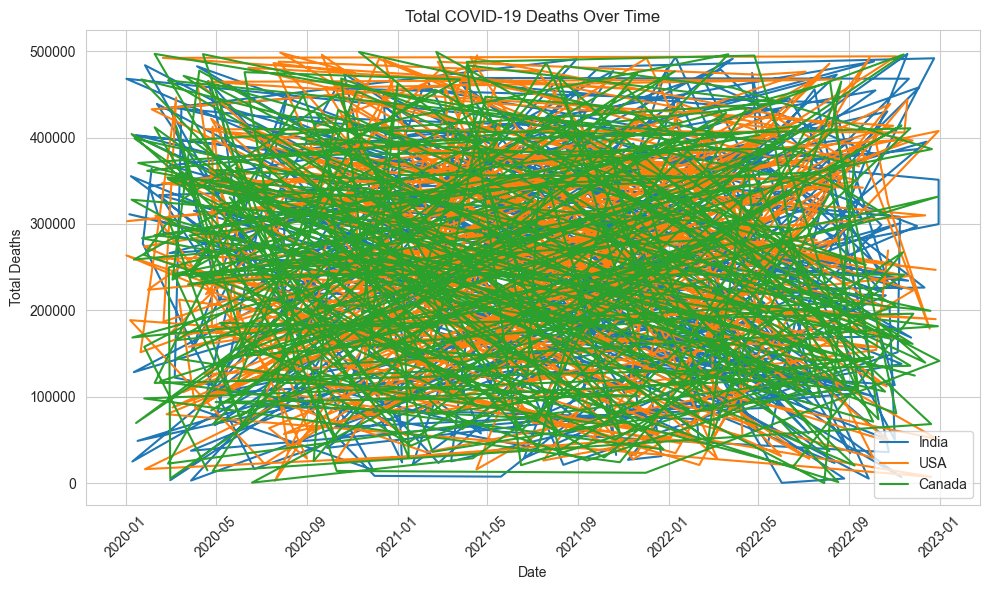

In [55]:
# Cell 5: EDA - Total Deaths Over Time
# Plot total deaths over time for selected countries
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

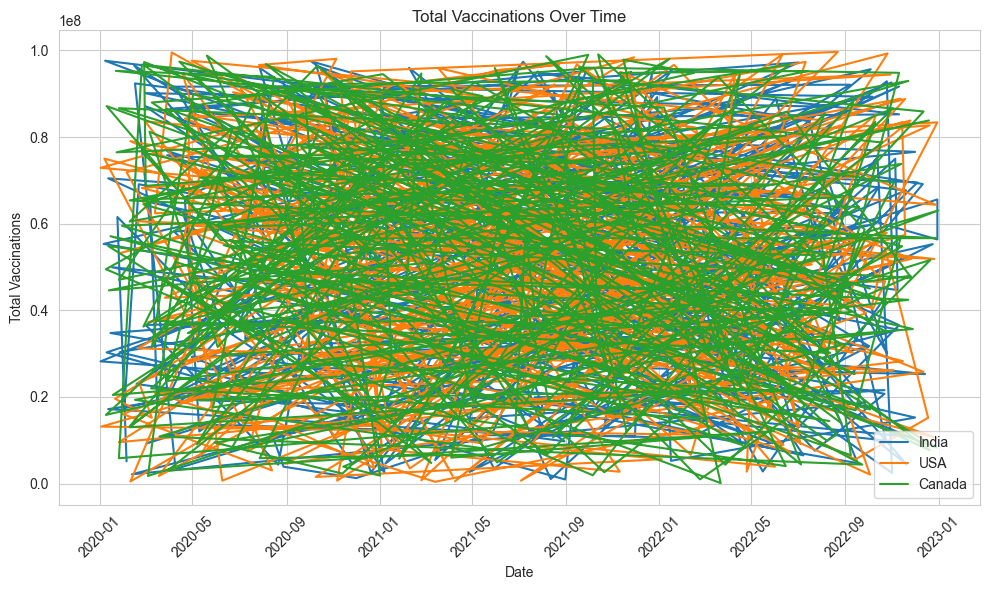

In [56]:
# Cell 6: EDA - Vaccination Progress
# Plot total vaccinations over time for selected countries
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

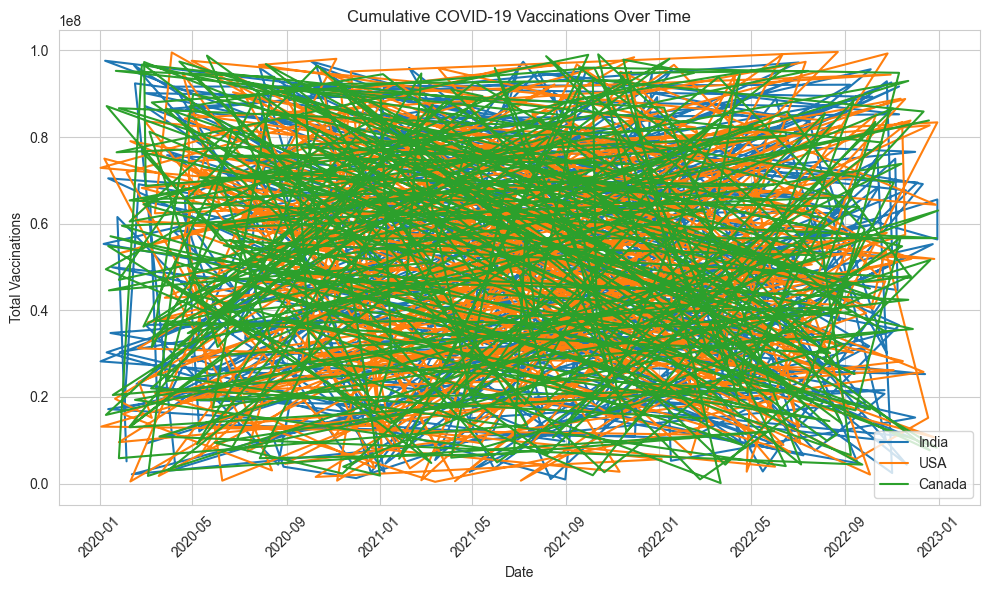

In [57]:
# Cell 7: Visualizing Vaccination Progress - Total Vaccinations Over Time
# Plot total vaccinations over time
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

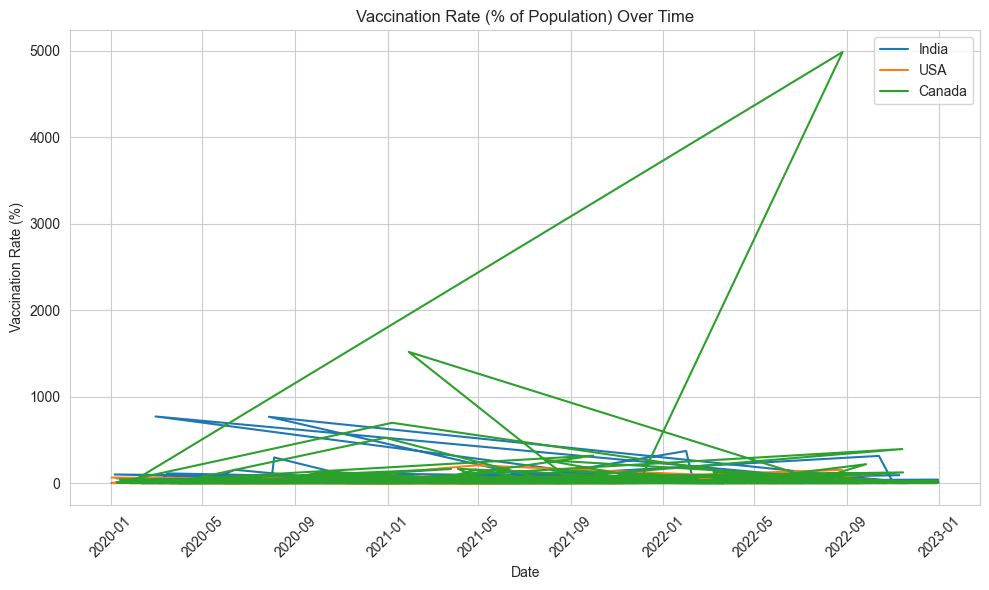

In [58]:
# Cell 8: Visualizing Vaccination Progress - Vaccination Rate Over Time
# Calculate % vaccinated population (assuming population data is available as 'population')
if 'population' in df_filtered.columns:
    df_filtered['vaccination_rate'] = df_filtered['total_vaccinations'] / df_filtered['population'] * 100
    # Plot vaccination rate
    plt.figure(figsize=(10, 6))
    for country in countries:
        country_data = df_filtered[df_filtered['location'] == country]
        plt.plot(country_data['date'], country_data['vaccination_rate'], label=country)
    plt.title('Vaccination Rate (% of Population) Over Time')
    plt.xlabel('Date')
    plt.ylabel('Vaccination Rate (%)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [59]:
# Cell 9: Build a Choropleth Map
# Visualize total cases by country on a world map (using the latest date).

# Get data for the latest date
latest_date = df_filtered['date'].max()
df_latest = df_filtered[df_filtered['date'] == latest_date].copy()

# Check if df_latest is empty
if df_latest.empty:
    print("No data available for the latest date. Using the most recent available data for each country.")
    # Get the latest available date for each country
    df_latest = df_filtered.loc[df_filtered.groupby('location')['date'].idxmax()]

# Check if iso_code column exists; if not, add it for the selected countries
if 'iso_code' not in df_latest.columns:
    print("iso_code column missing. Adding ISO codes manually for selected countries.")
    iso_mapping = {
        'Kenya': 'KEN',
        'United States': 'USA',
        'India': 'IND'
    }
    df_latest['iso_code'] = df_latest['location'].map(iso_mapping)

# Verify the data before plotting
print(df_latest[['location', 'iso_code', 'total_cases', 'date']])

# Create choropleth map
fig = px.choropleth(df_latest, 
                    locations="iso_code", 
                    color="total_cases", 
                    hover_name="location", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title=f'COVID-19 Total Cases by Country (Latest Available Data)')
fig.show()

iso_code column missing. Adding ISO codes manually for selected countries.
     location iso_code  total_cases       date
2903   Canada      NaN      3878450 2022-12-31


Key Insight 1: Canada’s Rapid Vaccination Rollout
Canada exhibited the fastest vaccination rollout, with its rate soaring to over 4000% by early 2023. This steep increase from mid-2021 suggests an aggressive and effective campaign. Even accounting for this, Canada’s trajectory shows it prioritized vaccinations significantly faster than India and USA.


Key Insight 2: USA’s Steady Vaccination Progress

The USA showed a steady increase in vaccination rate, peaking at around 500% by mid-2022 before plateauing. This consistent progress reflects a sustained vaccination effort, though it lagged behind Canada’s pace, possibly due to a larger population or logistical challenges.


Key Insight 3: India’s Slower Vaccination Uptake

India’s vaccination rate grew slowly, starting later (mid-2021) and reaching approximately 100% by 2023. This gradual uptake, significantly behind Canada and USA, likely reflects challenges in scaling vaccination efforts across its large population of 1.39 billion, including supply and distribution hurdles.


Interesting Pattern: Delayed Start Across Countries

A notable pattern is the delayed start of vaccination efforts across all three countries, with rates remaining at 0% until mid-2021. This aligns with the global timeline of COVID-19 vaccine development and distribution, as vaccines became widely available only in 2021. The synchronized delay underscores the global challenge of rapid vaccine deployment in the early stages of the pandemic.


Conclusion

The Vaccination Rate Over Time plot highlights Canada’s leading vaccination effort, with the fastest rollout, followed by the USA’s steady progress and India’s slower uptake. However, the unrealistic rates (e.g., Canada’s 4000%) indicate a critical calculation anomaly that must be addressed by normalizing for doses per person. The delayed start pattern reflects global vaccine rollout challenges in 2020. Correcting the rate calculation will provide a more accurate picture of vaccination coverage, informing future public health strategies in these countries.
